## Simple Linear Regression -Salary Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[20.0,10.0]

In [2]:
data= pd.read_csv('datasets/datasets/salary_data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

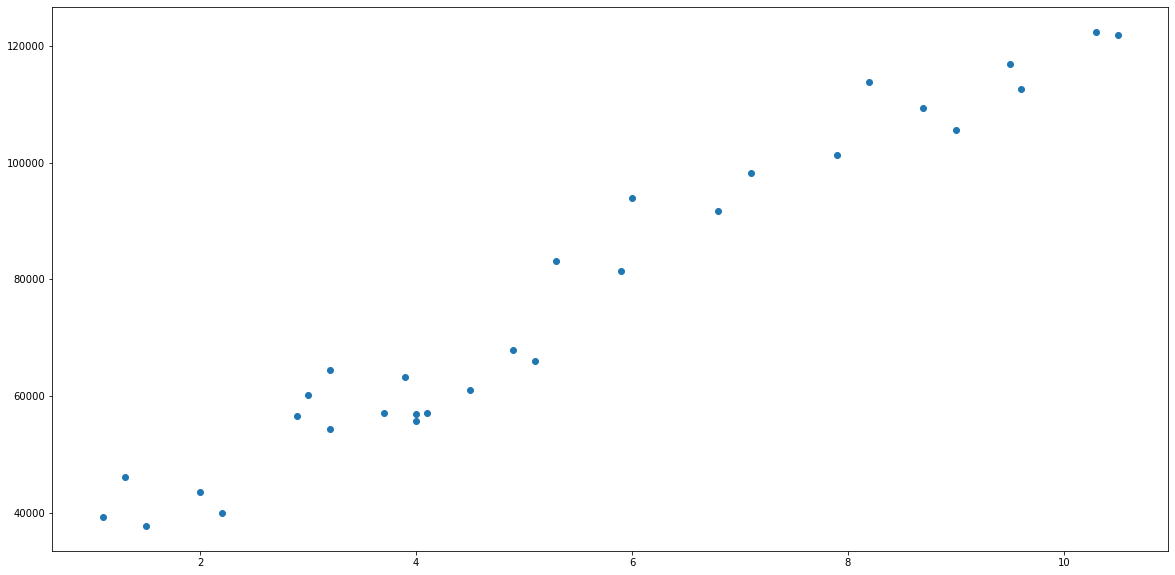

In [5]:
## Check the correlation between X and Y
plt.scatter(data['YearsExperience'],data['Salary'])

In [6]:
np.corrcoef((data['YearsExperience'],data['Salary']))

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [7]:
np.corrcoef((data['YearsExperience'],data['Salary']))[0,1]

0.9782416184887599

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

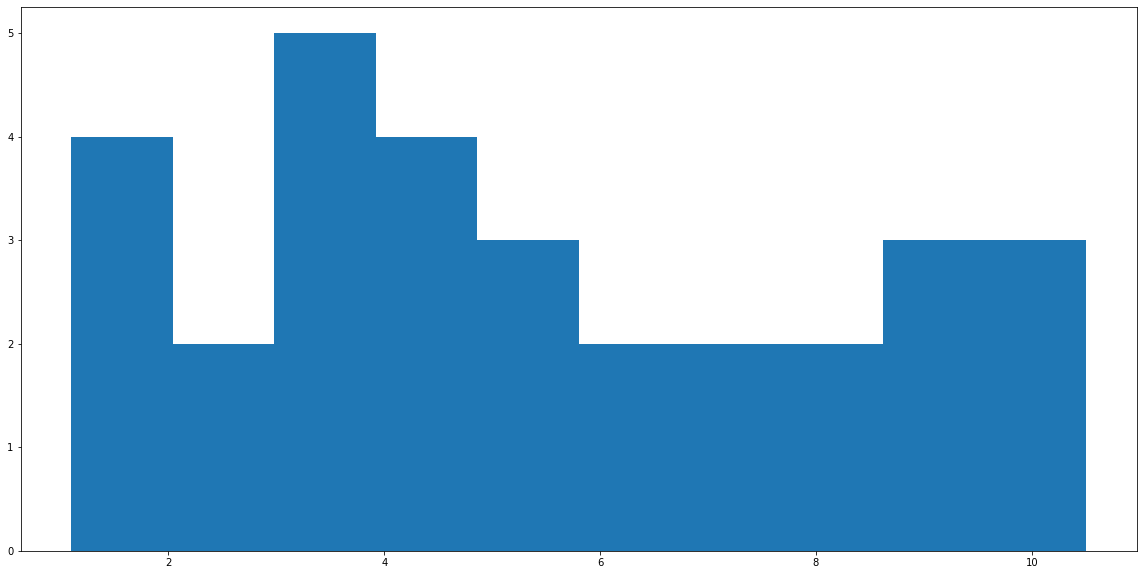

In [8]:
plt.hist(data['YearsExperience'])

In [9]:
data['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

<AxesSubplot:>

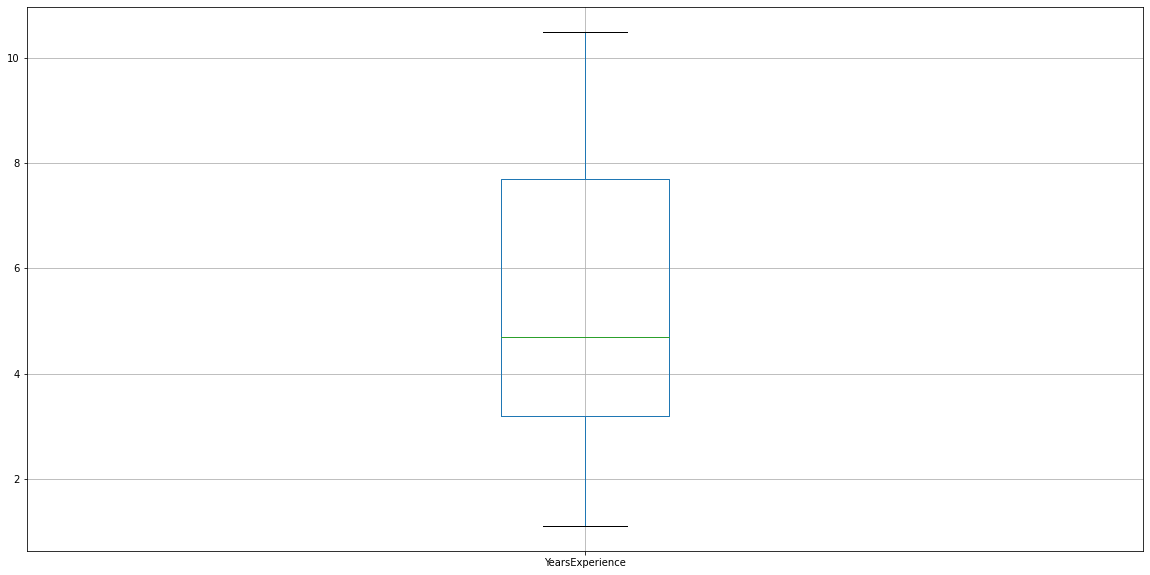

In [10]:
data.boxplot(column='YearsExperience')

In [11]:
X=data['YearsExperience'].values
Y=data['Salary'].values

In [12]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)

numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom

b0=mean_y-(b1*mean_x)
print(b0,b1)



25792.20019866869 9449.962321455077


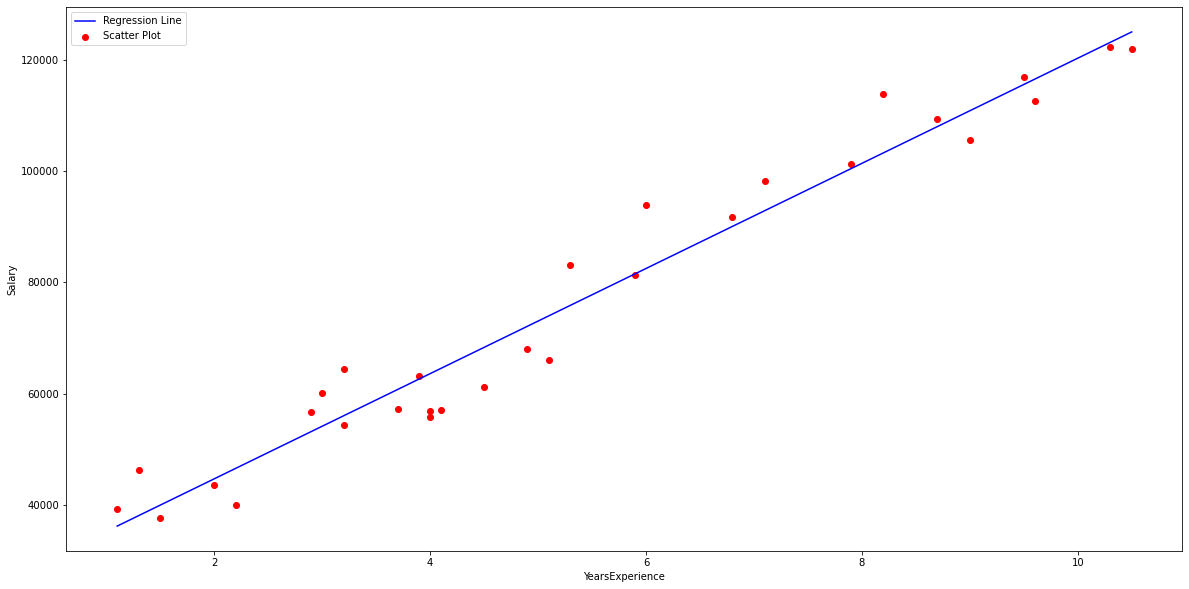

In [13]:
y_pred= b0 + b1 *X

plt.plot(X,y_pred,color='blue',label='Regression Line')
plt.scatter(X,Y,c='red',label='Scatter Plot')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [14]:
##Calculating Root mean square error-Cost Function
mse=0
for i in range(n):
    y_pred=b0+b1*X[i]
    mse+=(Y[i]-y_pred)**2
rmse=np.sqrt(mse/n)
print(rmse)

5592.043608760662


In [15]:
##R^2 Score-Accuracy
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2= 1-(ss_r/ss_t)
print(r2)

0.9569566641435086


In [16]:
new_x=4
y_new_pred=b0+b1 *new_x
y_new_pred

63592.049484489

## Using Scikit learn

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
X=X.reshape((n,1))

model=LinearRegression()
model=model.fit(X,Y)
y_pred=model.predict(X)

In [19]:
model.score(X,Y)

0.9569566641435086

In [20]:
mse=mean_squared_error(Y,y_pred)
rmse= np.sqrt(mse)
rmse

5592.043608760662

In [21]:
model.predict([[4]])

array([63592.04948449])